BASIC DECISSION TREE HOW TO WORK A DECISSION TREE 

#BASIC LIBRARY 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import(
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)
#make plot a bit larger by default
plt.rcParams['figure.figsize']=(7,5)

A SYNTHETIC DATA SET 

In [2]:
data={
    'weather':['sunny','rainy','sunny','sunny','rainy','sunny','rainy','sunny','rainy','rainy'],
    'windy':[0,1,0,1,0,1,0,1,0,1],
    'play':[1,0,1,1,0,1,0,1,0,0]
}
df=pd.DataFrame(data)
df

,weather,windy,play
0,sunny,0,1
1,rainy,1,0
2,sunny,0,1
3,sunny,1,1
4,rainy,0,0
5,sunny,1,1
6,rainy,0,0
7,sunny,1,1
8,rainy,0,0
9,rainy,1,0


 HERE WEATHER IS A  CATEGORICAL FEATURE SO THAT WE ENCODED THIS CATEGORICAL FEATURE 0,1 TO READY X AND Y

 

In [3]:
df['weather_num']=df['weather'].map({'sunny':1,'rainy':0})
df

,weather,windy,play,weather_num
0,sunny,0,1,1
1,rainy,1,0,0
2,sunny,0,1,1
3,sunny,1,1,1
4,rainy,0,0,0
5,sunny,1,1,1
6,rainy,0,0,0
7,sunny,1,1,1
8,rainy,0,0,0
9,rainy,1,0,0


In [4]:
x=df[['weather_num','windy']]
y=df['play']
print(x)
print(y)

   weather_num  windy
0            1      0
1            0      1
2            1      0
3            1      1
4            0      0
5            1      1
6            0      0
7            1      1
8            0      0
9            0      1
0    1
1    0
2    1
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: play, dtype: int64


TRIN  AN SIMPLE DECISSION TREE

In [5]:
tree=DecisionTreeClassifier(max_depth=3,random_state=42)
tree.fit(x,y)
tree

DecisionTreeClassifier(max_depth=3, random_state=42)

DRAW A DECISSION TREE 

Text(0.5, 1.0, 'Decission tree ')

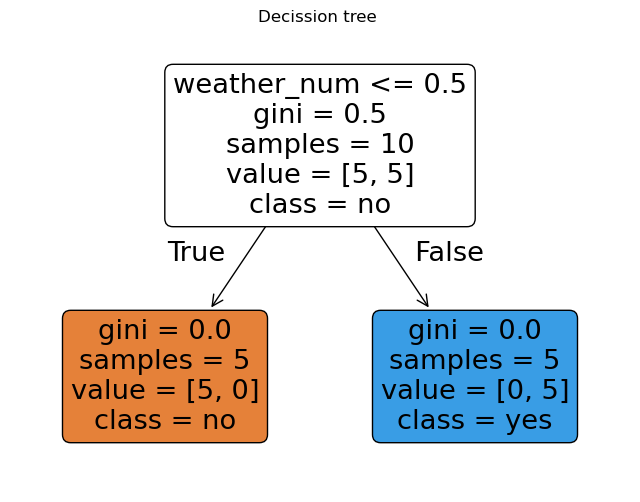

In [6]:
#class name yes=1,no=0

plt.figure(figsize=(8,6))
plot_tree(

    tree,
    feature_names=['weather_num','windy'],
    class_names=['no','yes'],
    filled=True,
    rounded=True
)
plt.title("Decission tree ")

In [7]:
#EXAMPLE SAME MODEL USE ANOTHER EXAMPLE TO PREDICT VALUE IF SUNNY = 1 AND WINDY =0

example=pd.DataFrame([[1,0]],columns=['weather_num','windy'])
pred_1=tree.predict(example)[0]
print("Sunny , not windy -> play prediction : ",pred_1)

Sunny , not windy -> play prediction :  1


In [8]:

example_1=pd.DataFrame([[0,1]],columns=['weather_num','windy'])
pred_2=tree.predict(example_1)[0]
print("Sunny , not windy -> play prediction : ",pred_2)

Sunny , not windy -> play prediction :  0


OVER FITTING AND PRUNNING OF DECISION TREE 

In this section, we will:

See how a deep tree can overfit

Compare it with a pruned tree using max_depth

Compare training vs test performance

We will use a slightly larger synthetic dataset so that overfitting becomes visible.

11.4.1 Create a slightly larger synthetic dataset

We create a synthetic binary classification dataset using sklearn.datasets.make_classification. This is not a real medical dataset, but it is enough to show overfitting clearly

In [21]:
#Create a slightly larger synthetic dataset
from sklearn.datasets import make_classification

X_big, y_big = make_classification(
    n_samples=400,#Total data points
    n_features=5,#Total feature number
    n_informative=3,#Total relevant features
    n_redundant=0,#No strong correlation among the features
    n_classes=2,#Target variable/feature class number
    random_state=42,#Every time we will get the similar random dataset
)

X_train_big, X_test_big, y_train_big, y_test_big = train_test_split(
    X_big, y_big, test_size=0.3, random_state=42
)

X_train_big.shape, X_test_big.shape

((280, 5), (120, 5))

Train a deep tree vs a pruned tree 

In [42]:
deep_tree=DecisionTreeClassifier(random_state=42)
deep_tree.fit(X_train_big,y_train_big)


DecisionTreeClassifier(random_state=42)

In [43]:
y_train_pred_deep_tree=deep_tree.predict(X_train_big)
y_test_pred_deep_tree=deep_tree.predict(X_test_big)

In [44]:
# WE SEE THE OUTPUT OF THE DEEP TREE WHICH DEEP WE DECLAIRE IS 3 

print("deep_tree_train accurancy ", round(accuracy_score(y_train_big,y_train_pred_deep_tree),3))
print("deep_tree_Test accurancy ", round(accuracy_score(y_test_big,y_test_pred_deep_tree),3))


deep_tree_train accurancy  1.0
deep_tree_Test accurancy  0.883


deep_tree_train accurancy  1.0

Deep_tree_Test accurancy  0.883

Here we see that our model is train well but when we test the model it show less output so we can say that our model is train very well but when its test it gives less output 

so our model is more over fitting in this situation 

PRUNED TREE 

In [39]:
#train a pruned tree with same data set 

pruned_tree=DecisionTreeClassifier(max_depth=3,random_state=42)
pruned_tree.fit(X_train_big,y_train_big)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [40]:
# predict value for test data 

y_train_pred_pruned=pruned_tree.predict(X_train_big)
y_test_pred_pruned=pruned_tree.predict(X_test_big)

In [45]:
# see accuracy 
print("Pruned_tree_train accurancy ", round(accuracy_score(y_train_big,y_train_pred_pruned),3))
print("Pruned_tree_Test accurancy ", round(accuracy_score(y_test_big,y_test_pred_pruned),3))

Pruned_tree_train accurancy  0.904
Pruned_tree_Test accurancy  0.892


pruned tree prediction is very well for tain and test data 

when we declare  max_depth then it show better output as usall 

Text(0.5, 1.0, 'Deep tree (Top 3 lavel)')

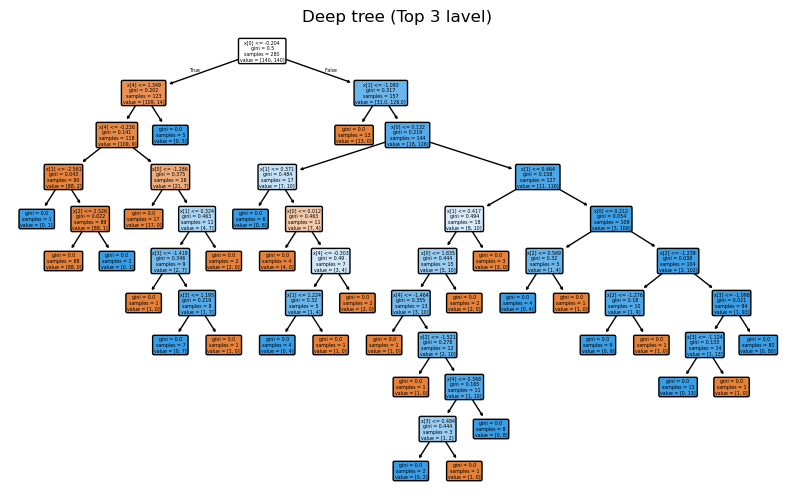

In [ ]:
#plot deep tree 

plt.figure(figsize=(10,6))
plot_tree(deep_tree,filled=True,rounded=True)
plt.title("Deep tree (full tree )")

Text(0.5, 1.0, 'pruned tree ( maximum_dept=3)')

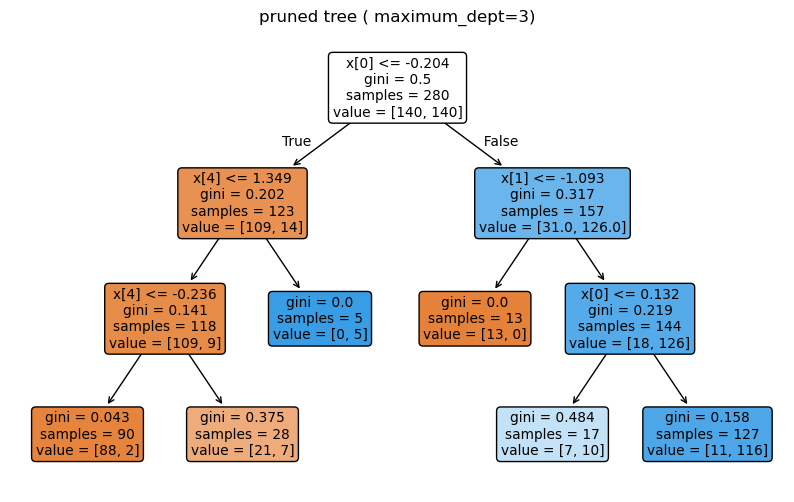

In [47]:
#Plot pruned tree 

plt.figure(figsize=(10,6))

plot_tree(pruned_tree,filled=True,rounded=True)

plt.title('pruned tree ( maximum_dept=3)')

Evaluating a Decision Tree (Accuracy, Precision, Recall, F1, Confusion Matrix)
In this section, we will:

Create a heart-disease-like synthetic dataset
Train a decision tree classifier
Compute and interpret:

Confusion matrix

Accuracy

Precision

Recall

F1 score

11.5.1 Create a toy heart-disease-like dataset
We simulate a dataset with a few features:

age

chol (cholesterol)

thalach (max heart rate achieved)

The target target will be 0 or 1 (no disease vs disease).

In [49]:
#create a synthetic data set for this decision tree model we predict  a result 

np.random.seed(42)
n_samples = 300

age = np.random.randint(30, 80, size=n_samples)
chol = np.random.randint(150, 300, size=n_samples)
thalach = np.random.randint(90, 200, size=n_samples)

# We create a simple rule-based probability for disease just for realism
risk_score = 0.03 * (age - 40) + 0.02 * (chol - 200) - 0.02 * (thalach - 140)
prob = 1 / (1 + np.exp(-0.05 * risk_score))

target = (prob > np.median(prob)).astype(int)

df_heart = pd.DataFrame({
    'age': age,
    'chol': chol,
    'thalach': thalach,
    'target': target
})

df_heart.head(10)

,age,chol,thalach,target
0,68,253,128,1
1,58,233,90,1
2,44,261,92,1
3,72,248,166,1
4,37,242,181,0
5,50,295,151,1
6,68,277,152,1
7,48,259,114,1
8,52,231,145,0
9,40,203,122,0


In [54]:
x_heart=df_heart[['age','chol','thalach']]
y_heart=df_heart['target']

In [57]:
x_train_h,x_test_h,y_train_h,y_test_h=train_test_split(x_heart,y_heart,test_size=0.2,random_state=42)
tree_heart=DecisionTreeClassifier(max_depth=4,random_state=42)
tree_heart.fit(x_train_h,y_train_h)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [58]:
#confusipon metrix

y_pred_heart=tree_heart.predict(x_test_h)


In [59]:
#confusipon metrix
cm=confusion_matrix(y_test_h,y_pred_heart)
print(cm)

[[23  3]
 [ 6 28]]


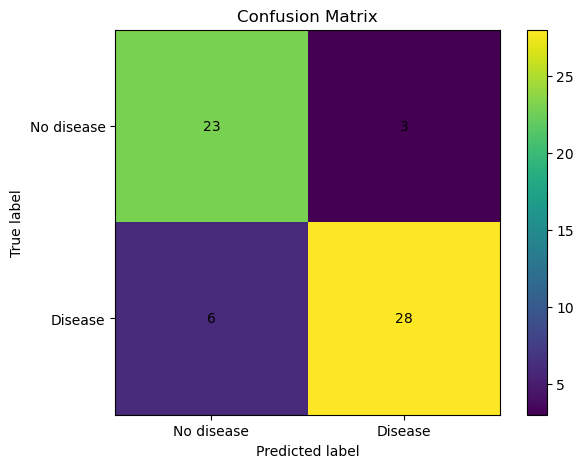

In [62]:
#Plot of Confusion Matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation = 'nearest')
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

# Show all ticks and label them
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(["No disease", 'Disease'])
ax.set_yticklabels(["No disease", 'Disease'])

# Loop over data dimensions and create text annotations.
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(j,i,cm[i,j], ha='center', va='center')

plt.colorbar(im)
plt.show()

In [63]:
#ACCURACY ,PRECISSION AND RECALL AND F1 SCORE PREDICTION 

acc=accuracy_score(y_test_h,y_pred_heart)
print("accuracy_score is ", acc)

precission=precision_score(y_test_h,y_pred_heart)
print("precision_score is : ", precission)

recall=recall_score(y_test_h,y_pred_heart)
print("recall_score is ", recall)

f_1=f1_score(y_test_h,y_pred_heart)
print("F1_score is ", f_1)



accuracy_score is  0.85
precision_score is :  0.9032258064516129
recall_score is  0.8235294117647058
F1_score is  0.8615384615384616


দরকার	Metric

ভুল রোগী ধরা কমাতে	Precision

রোগী মিস না করতে	Recall

দুটোই দরকার	F1 Score

Accuracy: overall correctness

Precision: among predicted positive, how many are truly positive

Recall: among actual positive, how many we caught

F1: harmonic mean of precision and recall

In this final section we:

Get predicted probabilities for the positive class
Compute the ROC curve (TPR vs FPR at different thresholds)
Compute AUC (Area Under the Curve)
Interpret what these mean for model quality.
11.6.1 Predicted probabilities
For ROC curves, we do not use just the final predictions (0 or 1). We use the predicted probability of the positive class.



In [64]:
#Predicted probabilities
y_proba_h = tree_heart.predict_proba(x_test_h)[:, 1]
y_proba_h[:10]

array([0.875     , 0.        , 0.04761905, 0.        , 0.875     ,
       1.        , 1.        , 1.        , 1.        , 0.        ])

11.6.2 ROC curve and AUC
We now compute:

fpr (false positive rate)

tpr (true positive rate)

thresholds used
Then we compute AUC and plot the ROC curve.

In [65]:
#ROC curve and AUC

fpr,tpr,thresholds = roc_curve(y_test_h, y_proba_h)

roc_auc = auc(fpr,tpr)

print('AUC: ',round(roc_auc, 3))

AUC:  0.925


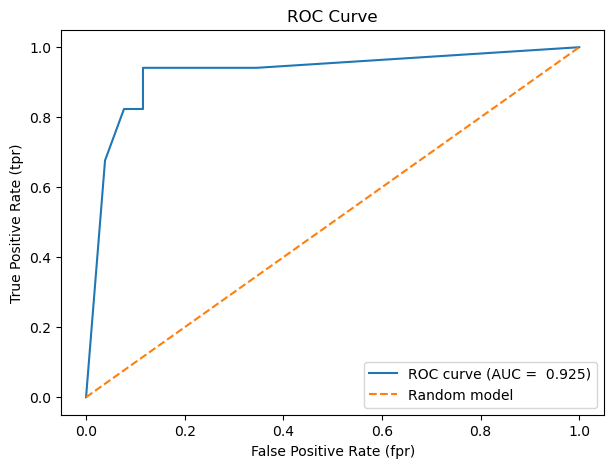

In [66]:
#Plot
plt.figure()
plt.plot(fpr,tpr, label=f'ROC curve (AUC = {roc_auc: .3f})')
plt.plot([0,1], [0,1], linestyle='--', label='Random model')
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title("ROC Curve")
plt.legend()
plt.show()

our model is better high better for this model because its prediction is on the 1 side 


Interpretation tips:

A curve closer to the top-left corner is better.

AUC near 1.0 means strong separation between classes.

AUC near 0.5 means the model is no better than random.